In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install h5py
import h5py

from PIL import Image
import cv2

## Roofline-Extraction

Training Data Sourced from [loosgagnet Roofline-Extraction via Github]('https://github.com/loosgagnet/Roofline-Extraction')

This dataset was created by the research team leading: [2D Image-To-3D Model: Knowledge-Based 3D Building Reconstruction (3DBR) Using Single Aerial Images and Convolutional Neural Networks (CNNs)]('https://doi.org/10.3390/rs11192219')

It consists of cropped images, nDSMs, and roof elements including three classes of eaves (red), ridges (green) and hips (blue)

---
Citation: Fatemeh Alidoost, Hossein Arefi, Federico Tombari; “2D Image-To-3D Model: Knowledge-Based 3D Building Reconstruction (3DBR) Using Single Aerial Images and Convolutional Neural Networks (CNNs)”, Remote Sens. 2019, 11, 2219, [https://doi.org/10.3390/rs11192219]('https://doi.org/10.3390/rs11192219')

In [6]:
# Import Roofline Training Data
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html < Unable to read the available .mat data
# mat = scipy.io.loadmat('../data/training_data/imdb.mat')

mat = h5py.File('../data/training_data/loosgagnet_Roofline-Extraction/imdb.mat','r')

<HDF5 file "imdb.mat" (mode r)>

In [37]:
mat.name

'/'

In [28]:
list(mat.keys())

['#refs#', 'imdb']

In [29]:
mat_imdb = mat['imdb']

In [38]:
mat_imdb.name

'/imdb'

##### Extract Images

In [66]:
mat_img = mat_imdb['images']

In [67]:
ar_img = np.array(mat_img)

In [68]:
ar_img[0].shape

(3, 224, 224)

In [69]:
# Swapping Axes to x,y, color channel
ar_img = np.moveaxis(ar_img, 1,3)
ar_img[0].shape

(224, 224, 3)

In [70]:
ar_img[0][0][:5]

array([[91., 70., 63.],
       [88., 65., 58.],
       [93., 70., 62.],
       [93., 70., 63.],
       [87., 68., 59.]], dtype=float32)

In [71]:
# Color Channels are provided as floats, converting to a 0-1 range to enable plotting via matplotlib
ar_img = ar_img / 255

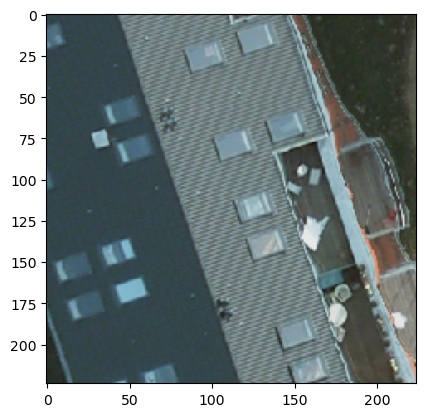

In [120]:
plt.imshow(ar_img[1], vmin=0, vmax=1);   

In [116]:
np.save('../data/training_data/loosgagnet_Roofline-Extraction/images', ar_img, allow_pickle = True)

##### Extract Masks

In [73]:
mat_imdb.keys()

<KeysViewHDF5 ['depths', 'elements', 'images']>

In [75]:
mat_elem = mat_imdb['elements']
mat_elem

<HDF5 dataset "elements": shape (1670, 3, 224, 224), type "<f4">

In [89]:
arr_elem = np.array(mat_elem)
arr_elem.shape

(1670, 3, 224, 224)

In [90]:
# Swapping axes
arr_elem = np.moveaxis(arr_mat, 1,3)
arr_elem.shape

(1670, 224, 224, 3)

In [91]:
arr_elem[0][0][:5]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [106]:
arr_elem[0].max()

1

In [111]:
# Colors are provided in floats ranging 0-1, converting to integer
arr_elem = (arr_elem * 255).astype(int).astype(np.uint8)

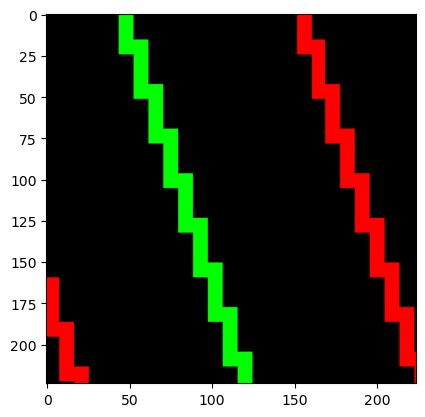

In [121]:
plt.imshow(arr_elem[1], vmin = 0, vmax = 255);

In [117]:
np.save('../data/training_data/loosgagnet_Roofline-Extraction/elements', arr_elem, allow_pickle = True)

## Building Detection

Training Data Sourced from [loosgagnet - Building-detection-and-roof-type-recognition](https://github.com/loosgagnet/Building-detection-and-roof-type-recognition)

This dataset was created by the research team leading: [A CNN-Based Approach for Automatic Building Detection and Recognition of Roof Types Using a Single Aerial Image - Alidoost & Arefi, 2019](https://link.springer.com/article/10.1007/s41064-018-0060-5)

It consists of two training datasets for the above named paper:
1. **Building Detection** - includes three classes of urban objects such as buildings, roads and trees (4800 IR-R-G images per class, after data augmentation)
1. **Roof-Type Detection** - includes three classes of roofs such as flat, gable and hip roofs (4800 IR-R-G images per class, after data augmentation)

Citation: Fatemeh Alidoost, Hossein Arefi; “A CNN-Based Approach for Automatic Building Detection and Recognition of Roof Types Using a Single Aerial Image”, PFG – Journal of Photogrammetry, Remote Sensing and Geoinformation Science, December 2018, Volume 86, Issue 5–6, pp 235–248, https://doi.org/10.1007/s41064-018-0060-5

Files are available in three folders: Building, Road, Tree - images are segmented by class within each folder

Each file is available in .tif format, which needs to be converted for compatibility with Tensorflow CNNs

In [166]:
# Cite: Anbarasan Thangapalam - https://stackoverflow.com/a/28872806
paths = ['../data/training_data/loosgagnet_Building-Detection/Building',
        '../data/training_data/loosgagnet_Building-Detection/Road',
        '../data/training_data/loosgagnet_Building-Detection/Tree']

for fol_path in paths:
    print(fol_path)
    for root, dirs, files in os.walk(fol_path, topdown = False):
        for name in files:
            if os.path.splitext(os.path.join(root, name))[1].lower() == '.tif':
                if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + '.jpg'):
                    print("File Exists: {name}")
                else:
                    outfile = os.path.splitext(os.path.join(root, name))[0] + '.jpg'
                    try:
                        im = Image.open(os.path.join(root, name))
                        im.save(outfile,'JPEG', quality = 100)
                        print(f"Converted {name}")
                    except:
                        print(f"Conversion Failed {name}")

../data/training_data/loosgagnet_Building-Detection/Building
Converted Building1425.tif
Converted Building756.tif
Converted Building3232.tif
Converted Building3554.tif
Converted Building2892.tif
Converted Building1343.tif
Converted Building1357.tif
Converted Building3540.tif
Converted Building2886.tif
Converted Building4549.tif
Converted Building3226.tif
Converted Building2138.tif
Converted Building1431.tif
Converted Building742.tif
Converted Building4561.tif
Converted Building2110.tif
Converted Building1419.tif
Converted Building2676.tif
Converted Building3568.tif
Converted Building4207.tif
Converted Building2662.tif
Converted Building4213.tif
Converted Building4575.tif
Converted Building2104.tif
Converted Building795.tif
Converted Building1380.tif
Converted Building3597.tif
Converted Building2851.tif
Converted Building2689.tif
Converted Building3583.tif
Converted Building2845.tif
Converted Building1394.tif
Converted Building781.tif
Converted Building959.tif
Converted Building971.tif


In [168]:
#cleanup .tif files
for fol_path in paths:
    print(fol_path)
    items = os.listdir(fol_path)
    for item in items:
        if item.endswith('.tif'):
            os.remove(os.path.join(fol_path,item))
    print("Cleaned up ", fol_path)

../data/training_data/loosgagnet_Building-Detection/Building
Cleaned up  ../data/training_data/loosgagnet_Building-Detection/Building
../data/training_data/loosgagnet_Building-Detection/Road
Cleaned up  ../data/training_data/loosgagnet_Building-Detection/Road
../data/training_data/loosgagnet_Building-Detection/Tree
Cleaned up  ../data/training_data/loosgagnet_Building-Detection/Tree


In [169]:
# Merge Files and Create Target .csv
combined_path = '../data/training_data/loosgagnet_Building-Detection/combined/'
os.mkdir(combined_path)

In [ ]:
# Move all files to a single directory
for fol_path in paths:
    items = os.listdir(fol_path)
    for item in items:
        #move files to shared directory    
        cur_path = os.path.join(fol_path, item)
        dest_path = os.path.join(combined_path, item)
        os.rename(cur_path, dest_path)

In [171]:
# Create a category target list
building_detection_targets = []

items = os.listdir(combined_path)
items.sort()
for item in items:
    if item.startswith('Building'):
        building_detection_targets.append('building')
    elif item.startswith('Tree'):
        building_detection_targets.append('tree')
    elif item.startswith('Road'):
        building_detection_targets.append('road')
    else:
        building_detection_targets.append('')

In [172]:
type(building_detection_targets)

list

In [173]:
building_detection_targets = np.array(building_detection_targets, dtype ='str')

In [177]:
np.savetxt('../data/training_data/loosgagnet_Building-Detection/combined_targets.csv', building_detection_targets, delimiter=',', fmt='%s')

TypeError: object of type 'bool' has no len()

## Building Masks - Spacenet V2

Spacenet V2 is a publicly available dataset from [Spacenet.ai](https://spacenet.ai/about-us/).  This data is commonly used in geospatial machine learning challenges similar to those operated on kaggle.com.  The Spacenet V2 [dataset](https://spacenet.ai/spacenet-buildings-dataset-v2/) covers four cities and provides maps of category-masked images, including maps for buildings viewed from satelite photography.  This data is ideal to train a Convolutional Neural Network to identify, locate and mask individual buildings for this project.

Spacenet V2 data is available for download via Amazon S3 bucket

Downloaded Training Data for Khartoum Locally via [Radiant MLHUB](https://mlhub.earth/data/spacenet2)

Current file directories are laid out such that images and image labels are stored in separate directories for each image.  Ex. img1 (multiple images) and img1-labels (geojson) are stored individually in unique directories.

Four image files are available for each image.  One will need to be selected, while the remainder are dropped to save space and processing time.  Images are stored as .tif files - these will need to be converted to a readable format for tensorflow.  

Labels are stored as geojson objects - these will need to be reformatted as images and centered on the image using the geo information available in stac.json format in each of the paired directories (the same bbox is listed in both the image stac.json and the image label stac.json files)

Image Preprocessing Approach:

1. Select image to use (MS, PAN, PS-MS, PS-RGB)
2. Loop through each of the directories by name (root and ends with)
1. 1. If the file matches the selected filetype, move it to a destination folder, rename to .png from .tif
1. 1. Else, delete the file (remove unused images)

Labels Preprocessing Approach:
1. Move all label files to a central directory
1. Loop through the geojson mask files and create a png file with filled in areas defined by the outline.

### File Organization

In [443]:
# Files extracted from the tarball.gz file are provided in the approximate directory structure
# L- Image1
#   L-- Image1_MS
#   L-- Image1_PAN
#   L-- Image1_PS-MS
#   L-- Image1_PS-RGB
# L- Image1-Label
#  L-- Image1.geojson

# Move Files to shared directories (all PS-RGB 16 bit tif files in one directory, all labels in a second.)
import os

parent_directory = '../data/training_data/spacenet_v2/sn2_AOI_5_Khartoum/'
labels = '-labels'
labels_dest = '../data/training_data/spacenet_v2/labels/'
img_file = 'PS-RGB.tif'
images_dest = '../data/training_data/spacenet_v2/images/'

for root, dirs, files in os.walk(parent_directory):
    if root.endswith(labels):
        for files in os.listdir(root):
            if not files.startswith("."): #ipynbcheckpoints
                if files.endswith(".geojson"):
                    filename = root.split('_')[-1].split('-')[0]
                    cur_path = os.path.join(root, files)
                    dest_path = os.path.join(labels_dest, filename+files)
                    # print(cur_path, dest_path)
                    os.rename(cur_path, dest_path)
    else:
         for files in os.listdir(root):
            if not files.startswith("."):
                if files.endswith(img_file):
                    # print(files)
                    filename = root.split('_')[-1]
                    # print(filename)
                    cur_path = os.path.join(root, files)
                    dest_path = os.path.join(images_dest, filename+files)
                    # print(dest_path)
                    os.rename(cur_path, dest_path)

### Restructure File Indices

File names are unique, but include gaps in the indices in the available file (ex 123 and 125 exist.  124 does not.)

In [444]:
png_image_path = '../data/training_data/spacenet_v2/images/' 
geojson_path = '../data/training_data/spacenet_v2/labels/'
mask_path = '../data/training_data/spacenet_v2/maps/'

imgs = os.listdir(png_image_path)
imgs = sorted(imgs)
imgs = [i for i in imgs if i.endswith('.tif')]

regex = re.compile(r'\d+')
imgs_num = []
for j in imgs:
    imgs_num += (regex.findall(j))

In [445]:
# print(len(imgs_num)) #1012
print(imgs_num[:2])

['1001', '1003']


In [446]:
for i in range(len(imgs_num)):
    # print(i+1, imgs_num[i])
    #sequential Images
    #img1000PS-RGB.png
    try:
        img_cur_path = os.path.join(png_image_path, 'img'+imgs_num[i]+'PS-RGB.tif')
        img_new_path = os.path.join(png_image_path, 'img'+str(i+1)+'PS-RGB_.tif')
        os.rename(img_cur_path, img_new_path)
    except:
        print(f"Image {imgs_num[i]} failed to convert to {i+1}")
    
    # geojson labels
    #img1000PS-RGB.png
    try:
        geo_cur_path = os.path.join(geojson_path, 'img'+imgs_num[i]+'label.geojson')
        geo_new_path = os.path.join(geojson_path, 'img'+str(i+1)+'label_.geojson')
        os.rename(geo_cur_path, geo_new_path)
    except:
        print(f"GEO {imgs_num[i]} failed to convert to {i+1}")
    
    # # mask pngs
    # #1000mask.png
    # try:
    #     mask_cur_path = os.path.join(mask_path, imgs_num[i]+'mask.png')
    #     mask_new_path = os.path.join(mask_path, str(i+1)+'mask_.png')
    #     os.rename(mask_cur_path, mask_new_path)
    # except:
    #     print(f"Mask {imgs_num[i]} failed to convert to {i+1}")

Use TIF files with GEOJSON files to create .tif masks for inspection

In [447]:
!pip install rioxarray
import rioxarray
!pip install rasterio
import rasterio
import rasterio.mask
import json
import re

In [448]:
# Leverage tif file and geojson to create png masks
# cite: https://gis.stackexchange.com/a/346899
tif_image_path = '../data/training_data/spacenet_v2/images/' 
geojson_path = '../data/training_data/spacenet_v2/labels/'
mask_output_path = '../data/training_data/spacenet_v2/maps/'

tifs = os.listdir(tif_image_path)
tifs = sorted(tifs)
tifs = [i for i in tifs if i.endswith('.tif')]

regex = re.compile(r'\d+')
tifs_num = []
for i in tifs:
    tifs_num += (regex.findall(i))
    
for j in tifs_num:
    # load in the geojson file
    with open(f"../data/training_data/spacenet_v2/labels/img{j}label_.geojson") as igj:
        data = json.load(igj)
    # if GDAL 3+
    crs = data["crs"]["properties"]["name"]
    # crs = "EPSG:4326" # if GDAL 2
    geoms = [feat["geometry"] for feat in data["features"]]

    # create empty mask raster based on the input raster
    rds = rioxarray.open_rasterio(f"../data/training_data/spacenet_v2/images/img{j}PS-RGB_.tif").isel(band=0)
    rds.values[:] = 1
    rds.rio.write_nodata(0, inplace=True)

    # clip the raster to the mask
    try:
        clipped = rds.rio.clip(geoms, crs, drop=False)
    except:
        clipped = rds

    # # or clip it inverted if that is what you wanted
    # clipped = rds.rio.clip(geoms, crs, drop=False, invert=True)

    # # write output to file
    clipped.rio.to_raster(f"../data/training_data/spacenet_v2/maps/{j}mask_.tif", dtype="uint8")

    # rds = rioxarray.open_rasterio("img.tif")
    # clipped = rds.rio.clip(geoms, crs, drop=False, invert=True)

### Generating Image Instance Segmentation Masks

Generating Image Instance Segmentation Masks
.tif images are created from the .geojson masks above (converted to .png files below for inspection)
If all images were known to contain one instance of the target or none (in this project, a single building or no building), the simple .png masks would suffice.

Both the training and prediction data include multiple instances of the same class (multiple buildings).  Mask R-CNN requires training instances to be individually identified and labeled to make similar predictions on evaluation data.

The approach leveraged borrows from Mustafa Aktas, who trained a Neural Network on similar SpacenetV2 data in 2021.
Cite: [Building-Detection-MaskRCNN](https://github.com/Mstfakts/Building-Detection-MaskRCNN/tree/master)

As geojson files are used in combination with .tif images to generate the mask and class arrays, this is done in-line at file loading during training.  See 05_Modeling for details.

In [488]:
# Leverage rioxarray functionality to convert individual geometries into arrays to be stacked for use in modeling
#Testing Approach to be leveraged in model data preparation

# cite: https://gis.stackexchange.com/a/346899 for approch in leveraging rasterio
# Cite: https://github.com/Mstfakts/Building-Detection-MaskRCNN/blob/master/SpaceNet_train.py on output layers for modeling.


tif_image_path = '../data/training_data/spacenet_v2/images/' 
geojson_path = '../data/training_data/spacenet_v2/labels/'

tifs = os.listdir(tif_image_path)
tifs = sorted(tifs)
tifs = [i for i in tifs if i.endswith('.tif')]

regex = re.compile(r'\d+')
tifs_num = []
for i in tifs:
    tifs_num += (regex.findall(i))   
    
tifs_num = ['1000','1001']
    
for j in tifs_num:
    # load in the geojson file
    with open(f"../data/training_data/spacenet_v2/labels/img{j}label_.geojson") as igj:
        data = json.load(igj)
    
    # if GDAL 3+
    crs = data["crs"]["properties"]["name"]
    # print(crs)
    # crs = "EPSG:4326" # if GDAL 2
    buildings = [feat for feat in data["features"]]
    # print(buildings)
    masks = np.zeros((650,650))
    for building in buildings:
        class_id = building["properties"]["OBJECTID_1"]
        # print(class_id)
        geom = [building["geometry"]]
        # print(geom)
        rds = rioxarray.open_rasterio(f"../data/training_data/spacenet_v2/images/img{j}PS-RGB_.tif").isel(band=0)
        # print('opened')
        rds.values[:] = 1
        # print('set_values')
        rds.rio.write_nodata(0,inplace=True)
        # print('write_nodata')
        
        try:
            mask = rds.rio.clip(geom, crs, drop = False)
            # print('clip')
        except:
            mask = rds
            # print('noclip')
        # print(class_id)
        np.append(class_ids, class_id)
        mask_ar = mask.values
        masks = np.dstack((masks, mask_ar))
    
    if masks.shape != (650,650):
        masks = masks[:,:,1:]
        class_ids = np.asarray([1]*masks.shape[2])
    else:
        class_ids=np.ones((1))
        masks = masks.reshape((650,650,1))
    print(masks.astype(np.bool), class_ids.astype(np.int32)) 

/var/folders/w7/4sqt0lt90t72lgqr2zq3p6l80000gn/T/ipykernel_25326/2165989473.py:63: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(masks.astype(np.bool), class_ids.astype(np.int32))


[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

/var/folders/w7/4sqt0lt90t72lgqr2zq3p6l80000gn/T/ipykernel_25326/2165989473.py:63: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(masks.astype(np.bool), class_ids.astype(np.int32))


### Converting Image Files from .tif to .png for Modeling

Check Convertability from .tif to .png

In [449]:
# The following code should work in processing .tif files to .jpg files if the files are in 8-bit format.
# This is not usually the case for satelite images.
# Test Images
fol_path = '../data/training_data/spacenet_v2/sn2_SN2_buildings_train_AOI_5_Khartoum_PS-RGB_img1/'
for root, dirs, files in os.walk(fol_path, topdown = False):
    for name in files:
        if os.path.splitext(os.path.join(root, name))[1].lower() == '.tif':
            if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + '.jpg'):
                print("File Exists: {name}")
            else:
                outfile = os.path.splitext(os.path.join(root, name))[0] + '.jpg'
                try:
                    im = Image.open(os.path.join(root, name))
                    im.save(outfile,'JPEG', quality = 100)
                    print(f"Converted {name}")
                except:
                    print(f"Conversion Failed {name}")

Image Files are formatted as 16 bit images, rather than the normal 8bit.  Custom code will need to be leveraged to convert provided tif files to png for use in modeling

Cite: [Medium.com](https://medium.com/the-downlinq/creating-training-datasets-for-the-spacenet-road-detection-and-routing-challenge-6f970d413e2f), 'Creating Training Datasets for the SpaceNet Road Detection and Routing Challenge' by Adam Van Etten and Jake Shermeyer

In [450]:
# cite: john-hen https://stackoverflow.com/a/56761935
import imageio
import cv2

def tif16_png8(source_directory, dest_directory):
    for files in os.listdir(source_directory):
        if files.endswith('.tif'):
            new_path = str(os.path.splitext(os.path.join(dest_directory, files))[0])+".png"
            image = imageio.imread(os.path.join(source_directory, files))
            # image = (image / image.max()) * 255  ## Lossy
            # # image = (image >> 8).astype('uint8') # bitshift 8 bits to the right, but turns all images black
            image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U) ## opencv method
            imageio.imwrite(new_path, image)

In [451]:
# deletes converted .tif files to save stoarage space
def clean_tif_files(directory):
    for item in os.listdir(directory):
        if item.endswith('.tif'):
            os.remove(os.path.join(directory,item))
    print("Cleaned up ", directory)

In [452]:
#convert satelite imagery - same directory
tif16_png8('../data/training_data/spacenet_v2/images/',
          '../data/training_data/spacenet_v2/images/')

/var/folders/w7/4sqt0lt90t72lgqr2zq3p6l80000gn/T/ipykernel_25326/2973141267.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(source_directory, files))


In [411]:
# TIF files are required at model training
#remove satelite .tif images
# clean_tif_files('../data/training_data/spacenet_v2/images/')

Cleaned up  ../data/training_data/spacenet_v2/images/


In [453]:
#convert map files - same directory
tif16_png8('../data/training_data/spacenet_v2/maps/',
          '../data/training_data/spacenet_v2/maps/')

/var/folders/w7/4sqt0lt90t72lgqr2zq3p6l80000gn/T/ipykernel_25326/2973141267.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(source_directory, files))


In [454]:
#remove map .tif images
clean_tif_files('../data/training_data/spacenet_v2/maps/')

Cleaned up  ../data/training_data/spacenet_v2/maps/
